In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class MLP:
    def __init__(self,train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        #initialization
        self.w01 = np.random.uniform(size=(num_input,num_hidden))
        self.b01 = np.random.uniform(size=(1,num_hidden))
        self.w12 = np.random.uniform(size=(num_hidden, num_output))#2,1
        self.b12 = np.random.uniform(size=(1, num_output))

        self.losses = []

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    def delsigmoid(self, x):
        return x*(1-x)
    
    
    def tanh(self, x):
        return ((1-np.exp(-2*x))/(1+np.exp(-2*x)))
    def deltanh(self, x):
        return (1-x)*(1+x)


    def forward(self, batch):
        self.hidden = np.dot(batch, self.w01)+self.b01
        self.hidden_out = self.sigmoid(self.hidden)
        self.output = np.dot(self.hidden_out, self.w12)+self.b12
        self.output_final = self.sigmoid(self.output)
        return self.output_final
    def update_weights(self):
        loss = 0.5*(self.target-self.output_final)**2
        self.losses.append(np.sum(loss))
        error_term = self.output_final-self.target
        
        grad12 = error_term*self.delsigmoid(self.output_final)
        grad01 = np.dot(grad12, self.w12.T)*self.delsigmoid(self.hidden_out)

        self.w01-=self.lr*np.dot(self.train_data.T, grad01)
        self.w12-=self.lr*np.dot(self.hidden_out.T, grad12)

        self.b01-=self.lr*np.sum(grad01, axis=0)
        self.b12-=self.lr*np.sum(grad12, axis=0)
    def train(self):
        for epoch in range(self.num_epochs):
            self.forward(self.train_data)
            self.update_weights()
    def classify(self,datapoint):
        if self.forward(datapoint)>=0.5:
            return 1
        return 0
    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

In [3]:

train_data = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

In [4]:
target_xor = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [5]:
target_or = np.array([
    [0],
    [1],
    [1],
    [1]
])

In [6]:
mlp = MLP(train_data, target_xor, 0.2, 10000)
mlp.train()
mlp.classify([0,1])

1

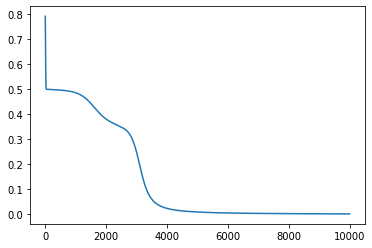

In [7]:
plt.plot(mlp.losses)

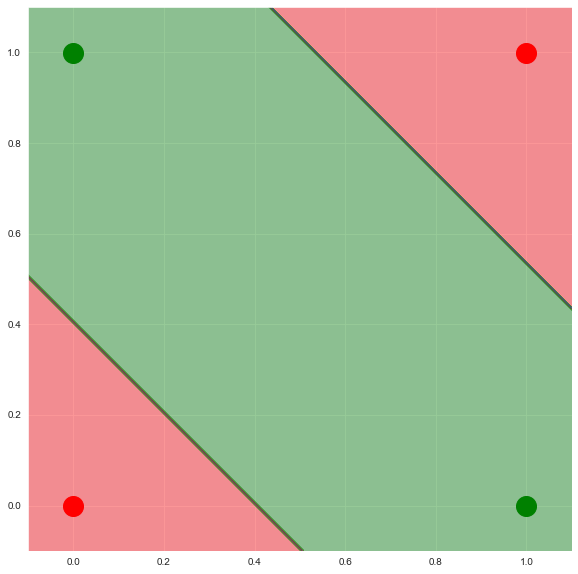

In [8]:
mlp.plot()

In [9]:
mlp.b01


array([[-6.27567537, -2.67765465]])

In [10]:
w01 = np.random.uniform(size=(2,2))
print(w01)

[[0.28176131 0.65253245]
 [0.86670597 0.73589874]]
